### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from math import sqrt
import joblib
import time
from scipy.stats import pearsonr
from scipy.stats import linregress
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier, KerasRegressor
#from keras.wrappers.scikit_learn import KerasRegressor
import keras_tuner
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.optimizers import Adam, RMSprop



### Data Analysis and Features selection

In [2]:
Train_1 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-1')
Train_2 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-2')
Train_3 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-3')
Train_4 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-4')
Train_5 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-5')
Train_6 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-6')
Train_7 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-7')
Train_8 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-8')
Train_9 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-9')
Train_10 = pd.read_excel('Project data set 1.xlsx', sheet_name='Train-10')

#concatenate the data

Train = pd.concat([Train_1, Train_2, Train_3, Train_4, Train_5, Train_6, Train_7, Train_8, Train_9, Train_10], ignore_index=True)

In [3]:
#Import data

Test_1 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-1')
Test_2 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-2')
Test_3 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-3')
Test_4 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-4')
Test_5 = pd.read_excel('Project data set 1.xlsx', sheet_name='Test-5')

Test = pd.concat([Test_1, Test_2, Test_3, Test_4, Test_5], ignore_index=True)

In [4]:
features=['x2', 'x5', 'x8','x6']

X=Train[features]
y=Train['BIS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)


In [6]:
Best val_loss So Far: 48.05971908569336
Total elapsed time: 00h 01m 41s
INFO:tensorflow:Oracle triggered exit
475/475 [==============================] - 1s 974us/step
Best Hyperparameters: {'num_hidden_layers': 4, 'layer_0_neurons': 52, 'layer_0_activation': 'tanh', 'layer_0_kernel_initializer': 'glorot_uniform', 'optimizer': 'adam', 'learning_rate': 0.0017189521784465862, 'layer_1_neurons': 42, 'layer_1_activation': 'tanh', 'layer_1_kernel_initializer': 'he_normal', 'layer_2_neurons': 42, 'layer_2_activation': 'tanh', 'layer_2_kernel_initializer': 'he_normal', 'layer_3_neurons': 42, 'layer_3_activation': 'tanh', 'layer_3_kernel_initializer': 'glorot_uniform', 'layer_4_neurons': 2, 'layer_4_activation': 'relu', 'layer_4_kernel_initializer': 'glorot_uniform'}
Best MSE: 48.05971908569336

SyntaxError: invalid syntax (4022959490.py, line 1)

In [ ]:
number of hidden layers=4 (containing units: 52,42,42,42), activation functions = tanh, relu,relu, relu, the optimizer =  adam, learning_rate=0.0017, and epoch = 100

In [10]:
np.random.seed(42)
tf.random.set_seed(42)

def build_model():
    model = Sequential()
    model.add(Dense(150, input_dim=4, activation='relu')), 
    model.add(Dense(50, activation='relu')), 
    model.add(Dense(100, activation='relu')), 
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

batch_size = 50

max_epochs=100
early_stopping = tf.keras.callbacks.EarlyStopping()

model=KerasRegressor(model=build_model)

model.fit(X_train, y_train, batch_size=batch_size, epochs=max_epochs, callbacks=[early_stopping], validation_data= (X_test, y_test), verbose=2)


#y_train_pred = model.predict(X_train)
train_score = model.score(X_train, y_train)
print('Train_score: ', train_score )


y_pred =model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
pearson_corr, _ = pearsonr(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Pearson Correlation:", pearson_corr)



Epoch 1/100
385/385 - 4s - loss: 339.2847 - val_loss: 120.9780 - 4s/epoch - 10ms/step
Epoch 2/100
385/385 - 2s - loss: 119.2038 - val_loss: 116.0614 - 2s/epoch - 4ms/step
Epoch 3/100
385/385 - 2s - loss: 108.7133 - val_loss: 100.6065 - 2s/epoch - 4ms/step
Epoch 4/100
385/385 - 2s - loss: 95.9226 - val_loss: 89.7130 - 2s/epoch - 4ms/step
Epoch 5/100
385/385 - 2s - loss: 83.6285 - val_loss: 75.6278 - 2s/epoch - 4ms/step
Epoch 6/100
385/385 - 2s - loss: 75.6381 - val_loss: 72.4064 - 2s/epoch - 4ms/step
Epoch 7/100
385/385 - 2s - loss: 72.3081 - val_loss: 67.8031 - 2s/epoch - 4ms/step
Epoch 8/100
385/385 - 2s - loss: 71.0130 - val_loss: 67.4353 - 2s/epoch - 4ms/step
Epoch 9/100
385/385 - 2s - loss: 69.7928 - val_loss: 69.0842 - 2s/epoch - 4ms/step
Epoch 10/100
385/385 - 2s - loss: 69.1061 - val_loss: 64.4950 - 2s/epoch - 4ms/step
Epoch 11/100
385/385 - 2s - loss: 68.0382 - val_loss: 64.1368 - 2s/epoch - 4ms/step
Epoch 12/100
385/385 - 2s - loss: 67.1165 - val_loss: 63.3082 - 2s/epoch - 4ms

Epoch 99/100
385/385 - 2s - loss: 48.6786 - val_loss: 47.5488 - 2s/epoch - 4ms/step
Epoch 100/100
385/385 - 2s - loss: 47.1919 - val_loss: 44.9027 - 2s/epoch - 4ms/step
601/601 [==============================] - 2s 2ms/step
Train_score:  0.8410708630666839
258/258 [==============================] - 1s 2ms/step
Mean Squared Error: 44.90274404047133
R-squared: 0.8451301302146773
Pearson Correlation: 0.9199046654619432


In [5]:


# Generate example data
np.random.seed(42)
tf.random.set_seed(42)


# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()
    
    # Tune the number of hidden layers
    num_hidden_layers = hp.Int('num_hidden_layers', min_value=3, max_value=5, step=1)
    
    # Tune the number of neurons in each layer
    for i in range(num_hidden_layers):
        num_neurons = hp.Int(f'layer_{i}_neurons', min_value=10, max_value=100, step=10)
        activation = hp.Choice(f'layer_{i}_activation', values=['relu', 'tanh'])
        kernel_initializer = hp.Choice(f'layer_{i}_kernel_initializer', values=['glorot_uniform', 'he_normal'])
        model.add(Dense(num_neurons, input_dim=4, activation=activation, kernel_initializer=kernel_initializer))
    
    # Tune the learning rate and optimizer
    optimizer = hp.Choice('optimizer', values=['adam', 'rmsprop'])
    learning_rate = hp.Float('learning_rate', min_value=0.00001, max_value=0.1, sampling='log')
    if optimizer == 'adam':
        optimizer = Adam(learning_rate=learning_rate)
    else:
        optimizer = RMSprop(learning_rate=learning_rate)
    
    model.add(Dense(1))  # Output layer for regression
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model
early_stopping = tf.keras.callbacks.EarlyStopping(patience=1)

# Instantiate the RandomSearch tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',  # Metric to optimize
    max_trials=500
    ,          # Number of hyperparameter combinations to try
    executions_per_trial=1, # Number of times to train the same model configuration
    directory='tuner_results',
    project_name='my_regression_tuner'
)

# Perform hyperparameter search
tuner.search(X_train, y_train, epochs=100, validation_data=(X_test, y_test),  callbacks=[early_stopping])

# Get the best model from the tuner
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Best Hyperparameters:", tuner.get_best_hyperparameters()[0].values)
print("Best MSE:", mse)


Trial 500 Complete [00h 00m 21s]
val_loss: 64.62010192871094

Best val_loss So Far: 49.707210540771484
Total elapsed time: 14h 01m 08s
INFO:tensorflow:Oracle triggered exit
258/258 [==============================] - 1s 2ms/step
Best Hyperparameters: {'num_hidden_layers': 5, 'layer_0_neurons': 50, 'layer_0_activation': 'tanh', 'layer_0_kernel_initializer': 'glorot_uniform', 'layer_1_neurons': 70, 'layer_1_activation': 'relu', 'layer_1_kernel_initializer': 'glorot_uniform', 'layer_2_neurons': 40, 'layer_2_activation': 'tanh', 'layer_2_kernel_initializer': 'he_normal', 'optimizer': 'adam', 'learning_rate': 0.001961672354813658, 'layer_3_neurons': 10, 'layer_3_activation': 'tanh', 'layer_3_kernel_initializer': 'glorot_uniform', 'layer_4_neurons': 20, 'layer_4_activation': 'tanh', 'layer_4_kernel_initializer': 'he_normal'}
Best MSE: 49.70719700219163


# 

# 

In [ ]:
# import shutil



# Remove the existing tuner results directory
shutil.rmtree('tuner_results')

In [7]:
import keras_tuner
from kerastuner.tuners import RandomSearch

### Evaluation metrics

In [6]:
model=best_model

In [11]:
model=model2

In [7]:

# Assuming you have 10 test datasets stored in a list called "test_datasets"
test_datasets = [Test_1, Test_2, Test_3, Test_4, Test_5, Test]  # Fill this with your test datasets

def evaluate_model_on_test_data(model, test_data,features):
    # Extract features (X) and labels (y) from the test data
    X_test = test_data[features]  # Adjust 'target_column_name' to your actual target column
    y_test = test_data['BIS']  # Adjust 'target_column_name' to your actual target column

    # Make predictions using the model
    y_pred = model.predict(X_test)


    # Calculate evaluation metrics
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    correlation_coefficient, _ = pearsonr(y_test, y_pred)

    return r_squared, mse, correlation_coefficient

y_train_pred = model.predict(X_train)
train_score = r2_score(y_train, y_train_pred)
print('Train_score: ', train_score )

print("---------------------------")

# Loop through each test dataset and evaluate the model
results = []
for test_data in test_datasets:
    r_squared, mse, correlation_coefficient = evaluate_model_on_test_data(model, test_data, features)
    results.append({'R-Squared': r_squared, 'MSE': mse, 'r': correlation_coefficient})

# Display results for each test dataset
for idx, result in enumerate(results):
    print(f"Results for Test Dataset {idx + 1}:")
    print("R-Squared:", result['R-Squared'])
    print("MSE:", result['MSE'])
    print('r:', result['r'])
    print("---------------------------")


601/601 [==============================] - 1s 1ms/step
Train_score:  0.8213077028795368
---------------------------
475/475 [==============================] - 1s 2ms/step
Results for Test Dataset 1:
R-Squared: 0.7980447688519876
MSE: 63.303917821887175
r: [0.9167795049405156]
---------------------------
Results for Test Dataset 2:
R-Squared: 0.7089712748898036
MSE: 61.12447252962519
r: [0.88091380324653]
---------------------------
Results for Test Dataset 3:
R-Squared: 0.7398715292394399
MSE: 80.03460366198605
r: [0.8768425818935874]
---------------------------
Results for Test Dataset 4:
R-Squared: 0.4924747544553204
MSE: 123.89455003100217
r: [0.7362057190524434]
---------------------------
Results for Test Dataset 5:
R-Squared: 0.7493610834829254
MSE: 86.51064233032832
r: [0.9515178205990728]
---------------------------
Results for Test Dataset 6:
R-Squared: 0.7079456790440544
MSE: 84.29512571266218
r: [0.841425080808342]
---------------------------


### Scatter Plot

### Scatter Plot

91/91 [==============================] - 0s 2ms/step


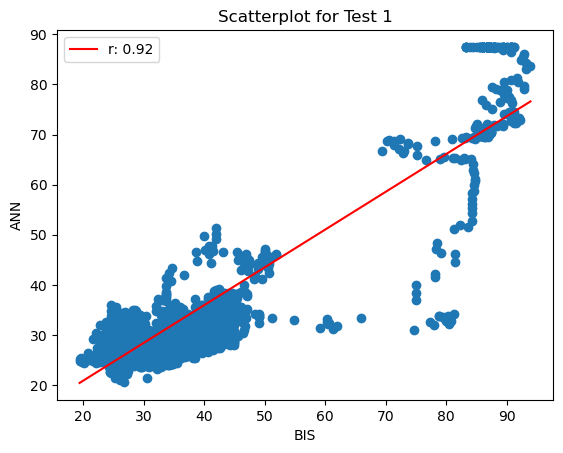

86/86 [==============================] - 0s 1ms/step


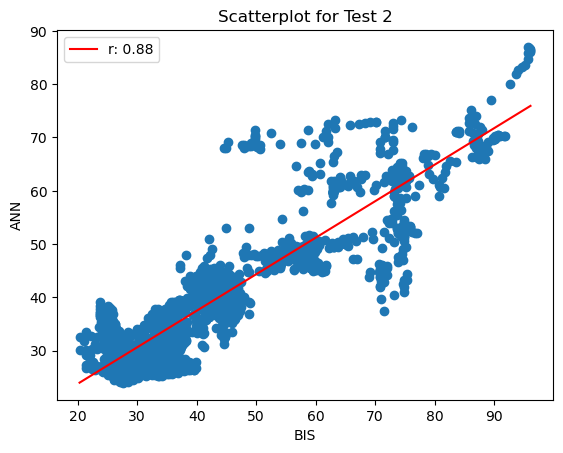

107/107 [==============================] - 0s 897us/step


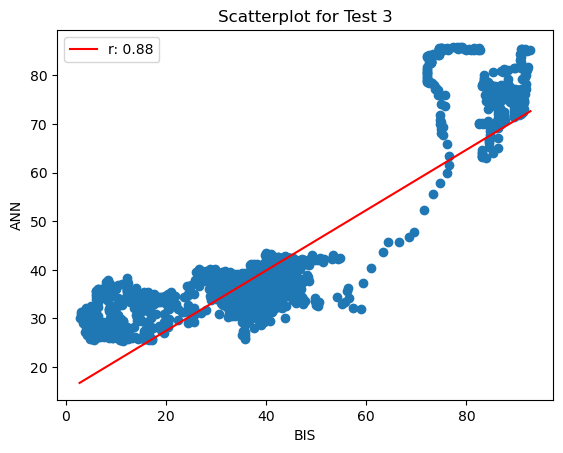

105/105 [==============================] - 0s 1ms/step


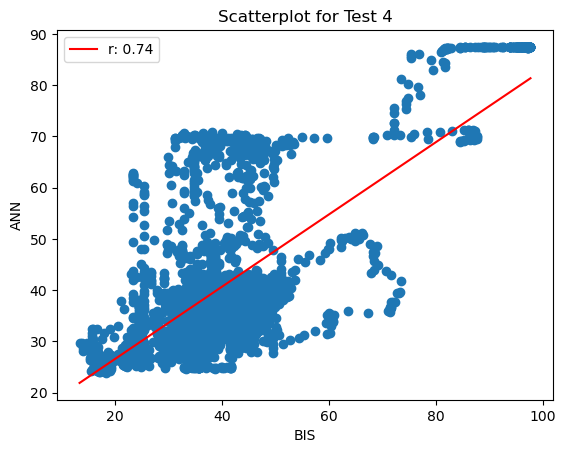

88/88 [==============================] - 0s 976us/step


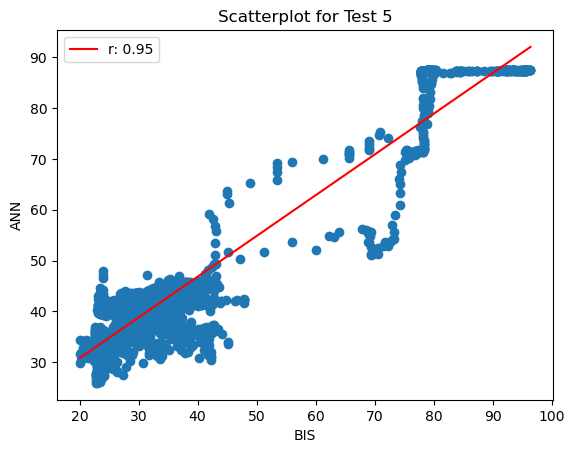

475/475 [==============================] - 0s 824us/step


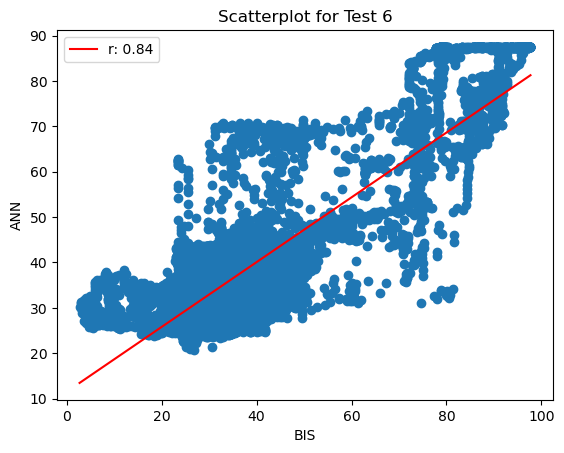

In [8]:
#model=grid_search

for idx, test_data in enumerate (test_datasets):
    X_test = test_data[features]
    y_test = test_data['BIS']
    y_pred = model.predict(X_test)
    y_pred1 = y_pred.squeeze()
    slope, intercept, r_value, p_value, std_err = linregress(y_test, y_pred1)
    x_range = np.array([y_test.min(), y_test.max()])
    plt.plot(x_range, slope * x_range + intercept, color='red', label=f'r: {round(r_value, 2)}')
    plt.scatter(y_test, y_pred)
    plt.xlabel('BIS')
    plt.ylabel('ANN')
    plt.title(f'Scatterplot for Test {idx+1}' )
    plt.legend()
    plt.show()
    

### Bland-Altman plots

91/91 [==============================] - 0s 959us/step


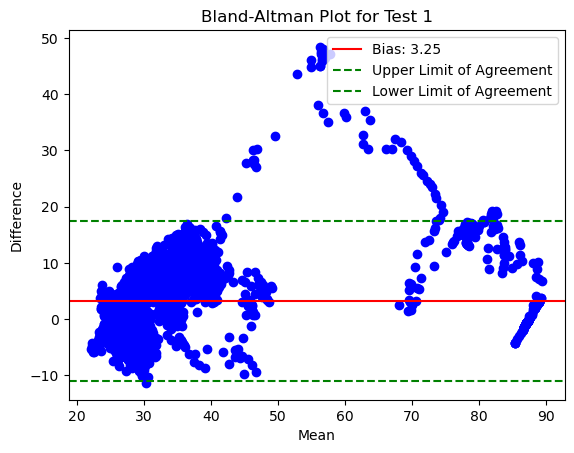

86/86 [==============================] - 0s 2ms/step


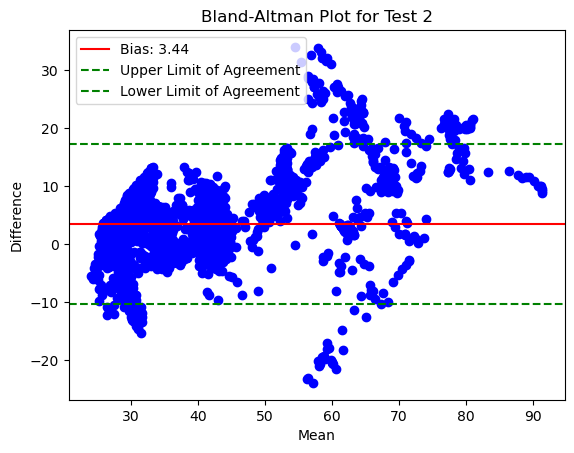

107/107 [==============================] - 0s 1ms/step


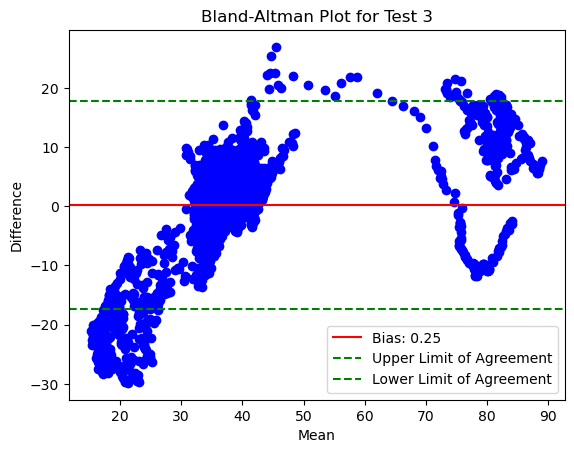

105/105 [==============================] - 0s 1ms/step


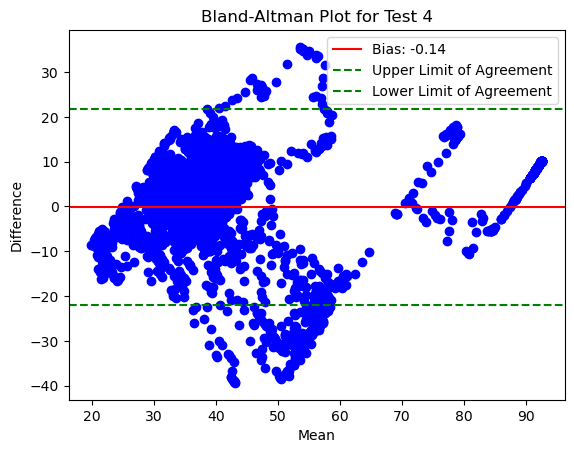

88/88 [==============================] - 0s 810us/step


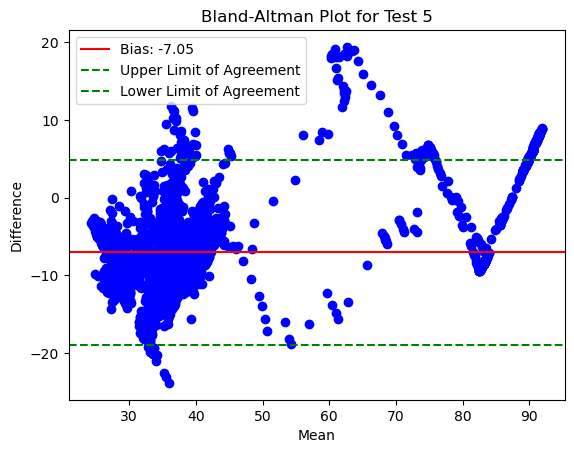

475/475 [==============================] - 1s 1ms/step


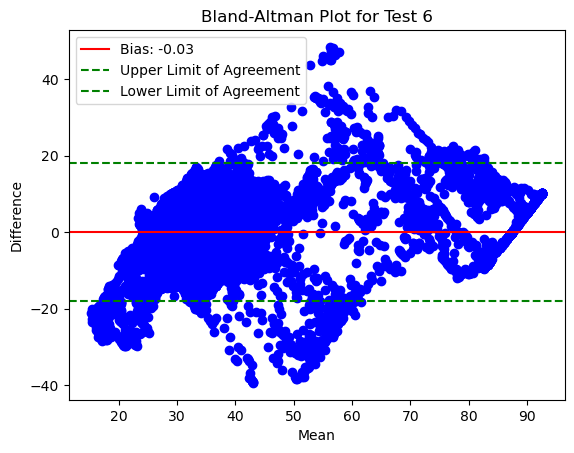

In [9]:
#model=grid_search

for idx, test_data in enumerate (test_datasets):
    X_test = test_data[features]
    y_test = test_data['BIS']  
  # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred1 = y_pred.squeeze()

    # Calculate residuals
    residuals = y_test - y_pred1

    # Bland-Altman Plot
    mean_difference = np.mean(residuals)
    limits_of_agreement = 1.96 * np.std(residuals)

    plt.scatter((y_pred1 + y_test) / 2, residuals, color='blue')
    plt.axhline(mean_difference, color='red', linestyle='-', label=f'Bias: {mean_difference:.2f}')
    plt.axhline(mean_difference + limits_of_agreement, color='green', linestyle='--', label='Upper Limit of Agreement')
    plt.axhline(mean_difference - limits_of_agreement, color='green', linestyle='--', label='Lower Limit of Agreement')
    plt.xlabel('Mean')
    plt.ylabel('Difference')
    plt.title(f'Bland-Altman Plot for Test {idx+1}')
    plt.legend()
    plt.show()

    

    

    
    
    




### Visualize New index with BIS

91/91 [==============================] - 0s 1ms/step
Normalized New Index:
[26.75663  28.097164 25.494118 23.429573 23.251476]


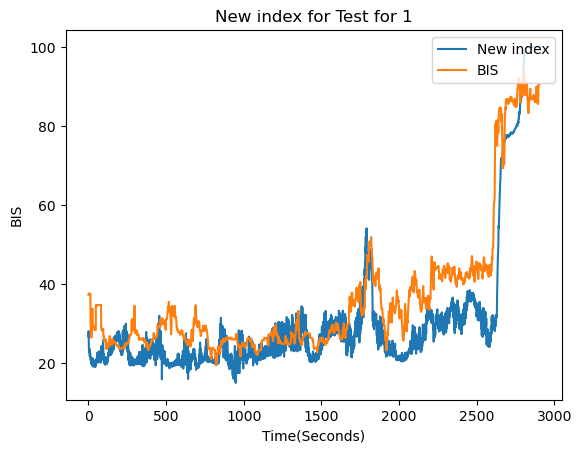

86/86 [==============================] - 0s 2ms/step
Normalized New Index:
[99.99999  99.653595 99.39303  99.28303  98.88405 ]


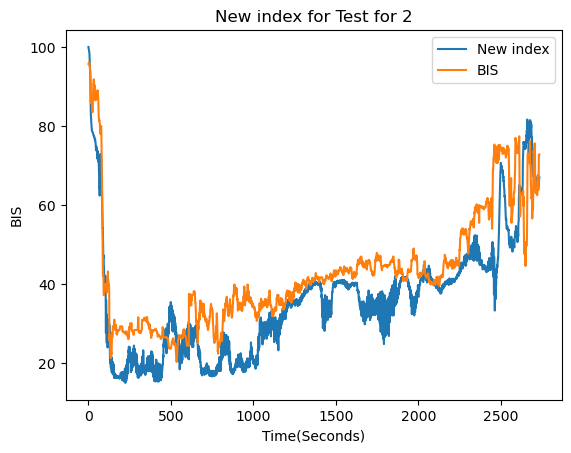

107/107 [==============================] - 0s 1ms/step
Normalized New Index:
[99.053665 98.97642  99.19977  99.089905 99.20583 ]


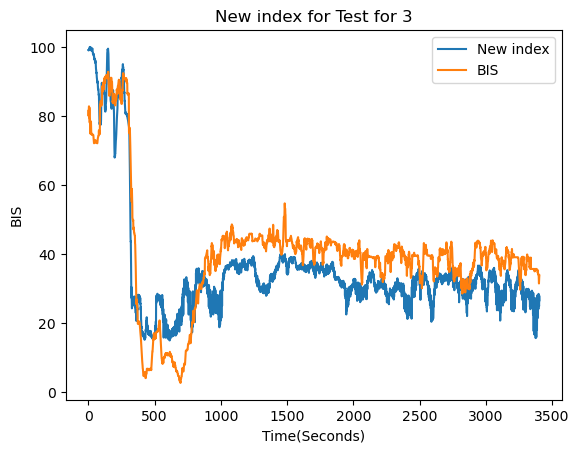

105/105 [==============================] - 0s 865us/step
Normalized New Index:
[99.97486  99.978226 99.98374  99.98823  99.98759 ]


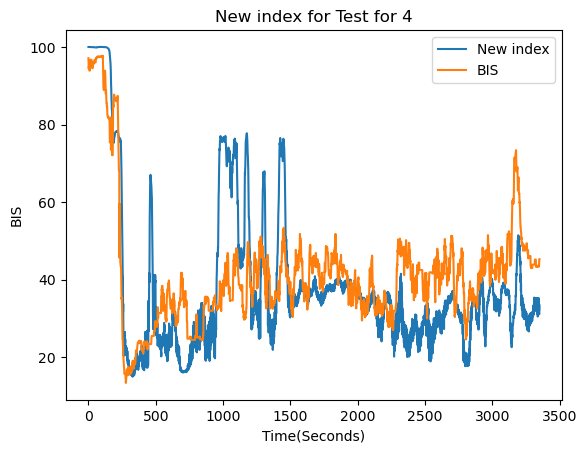

88/88 [==============================] - 0s 929us/step
Normalized New Index:
[99.97502 99.97586 99.97714 99.97363 99.97685]


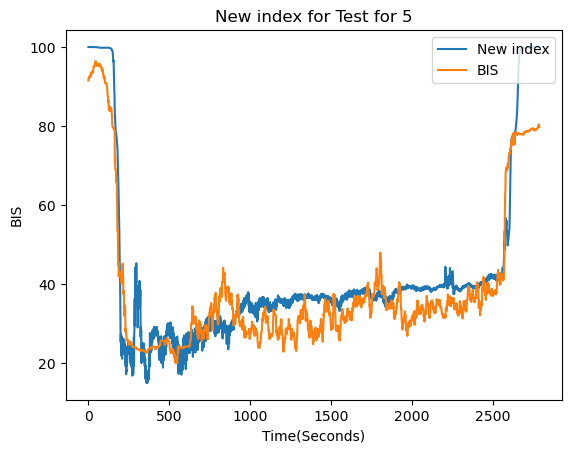

475/475 [==============================] - 1s 1ms/step
Normalized New Index:
[26.755478 28.095879 25.493088 23.428745 23.250668]


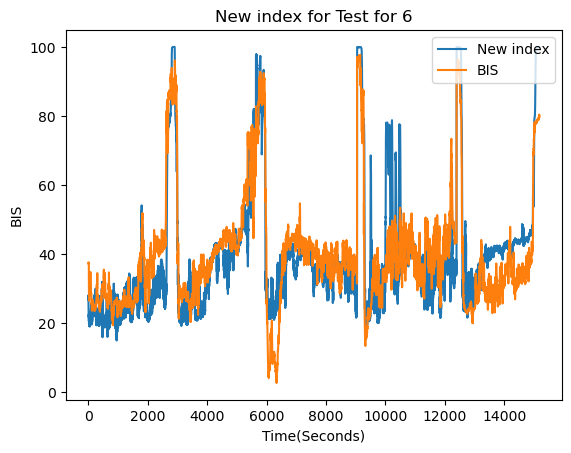

In [10]:
#modelf=grid_search

for idx, test_data in enumerate (test_datasets):
    X_test = test_data[features]
    y_test = test_data['BIS']  
    y_pred = model.predict(X_test)

    # Normalize the new index to the desired range (e.g., [0, 100]) using MinMaxScaler
    scaler = MinMaxScaler(feature_range=(15, 100))
    new_index_normalized = scaler.fit_transform(y_pred.reshape(-1, 1)).flatten()

    # Display the normalized new index for the first few data points
    print("Normalized New Index:")
    print(new_index_normalized[:5])

    plt.plot(new_index_normalized, label='New index')
    plt.plot(y_test,label ="BIS")
    plt.title(f"New index for Test for {idx+1}")
    plt.ylabel('BIS')
    plt.xlabel('Time(Seconds)')
    plt.legend(loc="upper right")
    plt.show()
